# [Model] Data Analytics Test - iFood
###### [By Israel Mendes](https://github.com/israelmendez232)

This notebook were generated by [Databricks](https://databricks.com/). The idea is to replicate more possible of the enviroment of the Data Analytics from iFood. 

The main library used here is [PyCaret](https://pycaret.readthedocs.io/en/latest/) to generate the model and tuning, because is very pratical and productive.
TODO: remove later
- Main article to start: https://towardsdatascience.com/announcing-pycaret-an-open-source-low-code-machine-learning-library-in-python-4a1f1aad8d46
- DOC focused on the Classification: https://pycaret.org/classification/
- Main DOC: https://pycaret.readthedocs.io/en/latest/index.html
- Jupyter notebook using PyCaret: https://github.com/pycaret/pycaret/blob/master/examples/PyCaret%202%20Classification.ipynb

In [2]:
import pandas as pd 

df = pd.read_csv("../data/ml_project1_data.csv") 

df.head(10)

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,...,5,0,0,0,0,0,0,3,11,0
5,7446,1967,Master,Together,62513.0,0,1,2013-09-09,16,520,...,6,0,0,0,0,0,0,3,11,0
6,965,1971,Graduation,Divorced,55635.0,0,1,2012-11-13,34,235,...,6,0,0,0,0,0,0,3,11,0
7,6177,1985,PhD,Married,33454.0,1,0,2013-05-08,32,76,...,8,0,0,0,0,0,0,3,11,0
8,4855,1974,PhD,Together,30351.0,1,0,2013-06-06,19,14,...,9,0,0,0,0,0,0,3,11,1
9,5899,1950,PhD,Together,5648.0,1,1,2014-03-13,68,28,...,20,1,0,0,0,0,0,3,11,0


In [3]:
# Setup for the classification model

from pycaret.classification import *
setup_sample = setup(df, target = 'Response')

,Description,Value
0,session_id,2733
1,Target,Response
2,Target Type,Binary
3,Label Encoded,"0: 0, 1: 1"
4,Original Data,"(2240, 29)"
5,Missing Values,True
6,Numeric Features,10
7,Categorical Features,17
8,Ordinal Features,False
9,High Cardinality Features,False


In [4]:
# Compare different models
best_model = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
catboost,CatBoost Classifier,0.8858,0.8808,0.6686,0.8748,0.8684,0.4290,0.4665,2.5350
lightgbm,Light Gradient Boosting Machine,0.8839,0.8779,0.6886,0.8712,0.8709,0.4504,0.4713,0.0610
ridge,Ridge Classifier,0.8832,0.0000,0.6653,0.8711,0.8657,0.4180,0.4534,0.0100
gbc,Gradient Boosting Classifier,0.8826,0.8678,0.6720,0.8695,0.8666,0.4254,0.4547,0.1440
xgboost,Extreme Gradient Boosting,0.8788,0.8616,0.6873,0.8666,0.8671,0.4394,0.4570,0.2420
lda,Linear Discriminant Analysis,0.8781,0.8753,0.7133,0.8690,0.8715,0.4709,0.4773,0.0190
et,Extra Trees Classifier,0.8743,0.8546,0.6194,0.8628,0.8472,0.3237,0.3844,0.0940
rf,Random Forest Classifier,0.8692,0.8685,0.6023,0.8511,0.8389,0.2833,0.3420,0.1030
ada,Ada Boost Classifier,0.8660,0.8427,0.6746,0.8515,0.8557,0.3974,0.4064,0.0660
lr,Logistic Regression,0.8558,0.7931,0.5802,0.8226,0.8232,0.2154,0.2527,0.3230


In [5]:
# Generate model
catboost = create_model('catboost')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.8662,0.8475,0.7055,0.8593,0.8623,0.4346,0.4360
1,0.9108,0.9137,0.7677,0.9046,0.9051,0.6002,0.6092
2,0.8599,0.8965,0.7018,0.8549,0.8572,0.4187,0.4193
3,0.9045,0.9001,0.7729,0.8984,0.8998,0.5967,0.6021
4,0.8599,0.8813,0.6612,0.8430,0.8479,0.3734,0.3835
5,0.8917,0.9157,0.7141,0.8817,0.8810,0.5060,0.5243
6,0.8917,0.8979,0.7483,0.8842,0.8864,0.5429,0.5479
7,0.8974,0.8392,0.7421,0.8892,0.8909,0.5427,0.5509
8,0.8526,0.8872,0.6798,0.8448,0.8482,0.3801,0.3813
9,0.8462,0.7738,0.6401,0.8299,0.8363,0.3140,0.3188


In [17]:
rf = create_model('rf', fold = 5)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.8599,0.8937,0.5670,0.8333,0.8208,0.1957,0.2599
1,0.8758,0.8542,0.6289,0.8608,0.8513,0.3458,0.3958
2,0.8530,0.8481,0.5630,0.8153,0.8180,0.1769,0.2158
3,0.8722,0.8995,0.6007,0.8605,0.8398,0.2869,0.3607
4,0.8754,0.8323,0.6026,0.8705,0.8423,0.2960,0.3819
Mean,0.8673,0.8655,0.5925,0.8481,0.8344,0.2603,0.3228
SD,0.0092,0.0264,0.0246,0.0206,0.0129,0.0639,0.0716


In [6]:
lda = create_model('lda')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.8662,0.8475,0.7055,0.8593,0.8623,0.4346,0.4360
1,0.9108,0.9137,0.7677,0.9046,0.9051,0.6002,0.6092
2,0.8599,0.8965,0.7018,0.8549,0.8572,0.4187,0.4193
3,0.9045,0.9001,0.7729,0.8984,0.8998,0.5967,0.6021
4,0.8599,0.8813,0.6612,0.8430,0.8479,0.3734,0.3835
5,0.8917,0.9157,0.7141,0.8817,0.8810,0.5060,0.5243
6,0.8917,0.8979,0.7483,0.8842,0.8864,0.5429,0.5479
7,0.8974,0.8392,0.7421,0.8892,0.8909,0.5427,0.5509
8,0.8526,0.8872,0.6798,0.8448,0.8482,0.3801,0.3813
9,0.8462,0.7738,0.6401,0.8299,0.8363,0.3140,0.3188


In [20]:
# Tune Hyperparameters
tuned_catboost = tune_model(catboost)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.8599,0.8761,0.5938,0.8311,0.8327,0.2508,0.2853
1,0.8726,0.9046,0.6553,0.8547,0.8572,0.3787,0.3984
2,0.8790,0.8718,0.6410,0.8632,0.8579,0.3681,0.4083
3,0.8981,0.8863,0.6837,0.8983,0.8797,0.4829,0.5415
4,0.8535,0.8534,0.5891,0.8233,0.8241,0.2396,0.2759
5,0.8726,0.8932,0.6346,0.8562,0.8496,0.3536,0.3966
6,0.8981,0.9336,0.7008,0.8927,0.8833,0.5051,0.5440
7,0.8974,0.8676,0.6702,0.8966,0.8776,0.4548,0.5175
8,0.9038,0.8856,0.6919,0.9035,0.8871,0.5009,0.5555
9,0.8974,0.8261,0.6881,0.8909,0.8815,0.4798,0.5211


In [10]:
# Tune Hyperparameters
tuned_lda = tune_model(lda)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.8790,0.8566,0.7490,0.8768,0.8779,0.5072,0.5074
1,0.8981,0.9182,0.7422,0.8899,0.8916,0.5431,0.5513
2,0.8280,0.8829,0.6471,0.8249,0.8264,0.2997,0.2998
3,0.9108,0.9107,0.7937,0.9061,0.9074,0.6305,0.6340
4,0.8408,0.8659,0.5987,0.8118,0.8203,0.2430,0.2577
5,0.8917,0.9185,0.6971,0.8824,0.8778,0.4852,0.5146
6,0.8854,0.9026,0.7274,0.8759,0.8784,0.5068,0.5138
7,0.8782,0.8663,0.7308,0.8721,0.8746,0.4879,0.4895
8,0.8846,0.8660,0.6986,0.8722,0.8742,0.4639,0.4777
9,0.8526,0.7862,0.6259,0.8302,0.8370,0.3003,0.3122


In [13]:
# creating a decision tree model
dt = create_model('dt')
# ensembling a trained dt model
dt_bagged = ensemble_model(dt)
boosted_dt = ensemble_model(dt, method = 'Boosting')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.8280,0.6291,0.6291,0.8187,0.8230,0.2730,0.2739
1,0.8599,0.6658,0.6658,0.8457,0.8509,0.3718,0.3774
2,0.8344,0.6689,0.6689,0.8344,0.8344,0.3378,0.3378
3,0.7580,0.6181,0.6181,0.7957,0.7741,0.2018,0.2064
4,0.7962,0.6748,0.6748,0.8231,0.8076,0.3076,0.3123
5,0.8153,0.6519,0.6519,0.8184,0.8168,0.2988,0.2989
6,0.8089,0.6994,0.6994,0.8347,0.8196,0.3509,0.3563
7,0.8397,0.6543,0.6543,0.8311,0.8350,0.3262,0.3273
8,0.8397,0.6363,0.6363,0.8254,0.8315,0.2996,0.3026
9,0.8333,0.6326,0.6326,0.8213,0.8266,0.2857,0.2874


In [21]:
# Blending the models
blender = blend_models(estimator_list = [boosted_dt, tuned_lda, tuned_catboost], method = 'soft')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.8726,0.8598,0.6733,0.8573,0.8610,0.4049,0.4168
1,0.9108,0.8984,0.7497,0.9046,0.9027,0.5834,0.6007
2,0.8854,0.8809,0.7167,0.8751,0.8780,0.4860,0.4933
3,0.8790,0.8581,0.7237,0.8700,0.8731,0.4891,0.4936
4,0.8726,0.8371,0.6858,0.8586,0.8617,0.4303,0.4420
5,0.8854,0.8925,0.6762,0.8741,0.8687,0.4433,0.4774
6,0.8854,0.9095,0.7274,0.8759,0.8784,0.5068,0.5138
7,0.8974,0.8565,0.7061,0.8885,0.8850,0.5026,0.5288
8,0.8846,0.8679,0.6626,0.8716,0.8667,0.4148,0.4505
9,0.8974,0.8091,0.6702,0.8966,0.8776,0.4548,0.5175


In [22]:
stacker = stack_models(estimator_list = [boosted_dt, tuned_lda, tuned_catboost], meta_model=catboost)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.8662,0.8803,0.6695,0.8512,0.8559,0.3880,0.3963
1,0.8981,0.9195,0.7422,0.8899,0.8916,0.5431,0.5513
2,0.8854,0.8887,0.7348,0.8780,0.8807,0.5059,0.5090
3,0.8917,0.8813,0.7483,0.8842,0.8864,0.5429,0.5479
4,0.8790,0.8518,0.7066,0.8674,0.8702,0.4693,0.4785
5,0.8726,0.9214,0.6858,0.8586,0.8617,0.4303,0.4420
6,0.8854,0.9367,0.7274,0.8759,0.8784,0.5068,0.5138
7,0.9038,0.8450,0.7458,0.8962,0.8964,0.5625,0.5746
8,0.8846,0.8735,0.7346,0.8772,0.8800,0.5055,0.5085
9,0.8910,0.8251,0.7024,0.8798,0.8796,0.4828,0.5020


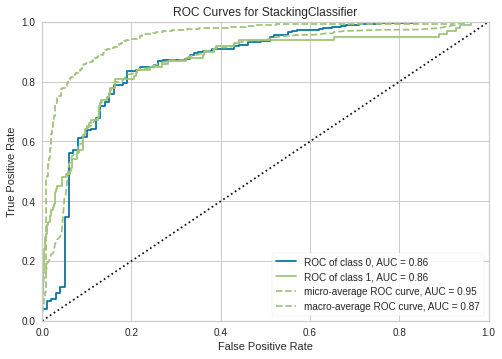

In [23]:
plot_model(stacker)

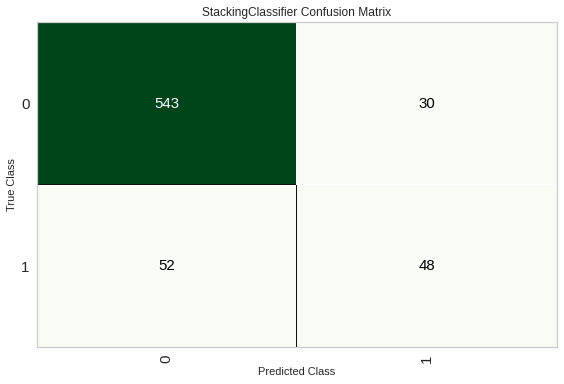

In [28]:
plot_model(stacker, plot = 'confusion_matrix')

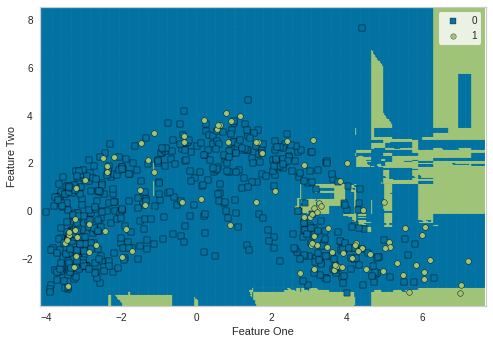

In [27]:
plot_model(stacker, plot = 'boundary')

In [32]:
best = automl(optimize = 'Recall')
best

StackingClassifier(cv=StratifiedKFold(n_splits=10, random_state=2733, shuffle=False),
                   estimators=[('ada',
                                AdaBoostClassifier(algorithm='SAMME.R',
                                                   base_estimator=DecisionTreeClassifier(ccp_alpha=0.0,
                                                                                         class_weight=None,
                                                                                         criterion='gini',
                                                                                         max_depth=None,
                                                                                         max_features=None,
                                                                                         max_leaf_nodes=None,
                                                                                         min_impurity_decrease=0.0,
                                             

In [33]:
pred_holdouts = predict_model(best)
pred_holdouts.head()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Stacking Classifier,0.8782,0.8649,0.7138,0.8684,0.8718,0.4704,0.4752


,ID,Year_Birth,Income,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,...,Dt_Customer_weekday_2,Dt_Customer_weekday_3,Dt_Customer_weekday_4,Dt_Customer_weekday_5,Dt_Customer_weekday_6,Dt_Customer_is_month_end_0,Dt_Customer_is_month_start_1,Response,Label,Score
0,1172.0,1983.0,92491.0,71.0,979.0,44.0,935.0,29.0,25.0,22.0,...,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1,1,0.7882
1,9592.0,1983.0,22010.0,51.0,11.0,2.0,9.0,3.0,0.0,8.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0,0,0.9870
2,286.0,1952.0,44213.0,48.0,95.0,11.0,35.0,0.0,4.0,7.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0,0,0.9740
3,2404.0,1976.0,53359.0,4.0,173.0,4.0,30.0,3.0,6.0,41.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0,0,0.9470
4,4437.0,1962.0,65316.0,65.0,112.0,6.0,92.0,3.0,9.0,38.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0,0,0.9890


In [31]:
new_data = df.copy()
new_data.drop(['Response'], axis=1, inplace=True)

predict_new = predict_model(stacker, data=new_data)
predict_new.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Label,Score
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,...,0,0,0,0,0,0,3,11,1,0.9229
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,...,0,0,0,0,0,0,3,11,0,0.9789
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,...,0,0,0,0,0,0,3,11,0,0.9520
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,...,0,0,0,0,0,0,3,11,0,0.9763
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,...,0,0,0,0,0,0,3,11,0,0.9817


In [35]:
save_model(best, model_name='stacker-classifier-model')

Transformation Pipeline and Model Succesfully Saved


(Pipeline(memory=None,
          steps=[('dtypes',
                  DataTypes_Auto_infer(categorical_features=[],
                                       display_types=True, features_todrop=[],
                                       id_columns=[],
                                       ml_usecase='classification',
                                       numerical_features=[], target='Response',
                                       time_features=[])),
                 ('imputer',
                  Simple_Imputer(categorical_strategy='not_available',
                                 fill_value_categorical=None,
                                 fill_value_numerical=None,
                                 numeric_str...
                                                                     random_state=2733)),
                                                 ('lda',
                                                  LinearDiscriminantAnalysis(n_components=None,
                               